Why python?
===========

- Easy batch processing
- Easy to implement custom functions
- Access to deep learing tools and pretrained models

Overview
========
- Opening images in python
- Visualizing 2D images
- Histograms
- Cropping
- Thresholding and label images
- Multi-channel images
- Visualizing nD images with napari
- Saving images from python

Opening images in python
========================
Many packages provide functions for loading images.
For common file formats you can use `scikit-image` or `opencv`.
If those don't work, you can look for specialized libraries.
Here is a non-exhaustive list of packes for specific formats:
* `tifffile`
* `mrcfile`
* `h5py`
* `hyperspy` for dm4 files
* `sims` for nanoSIMS data

Let's open our first image using `scikit-image`:

In [1]:
import skimage.io
img = skimage.io.imread("camera_2_img_000001.jpg")

Let's inspect the return value of this function...

In [2]:
type(img)

numpy.ndarray

In [3]:
img.shape

(480, 960)

In [4]:
img.dtype

dtype('uint8')

When you load an image into python it is returned to you as a `numpy` array.
Each entry of the array corresponds to a pixel value, i.e. the `shape` (size) of the array corresponds to the height and width of the image in pixels.
The pixel values are of a certain data type (`dtype`). When we talk about images this is often refered to as the bit-depth. The cameras/sensors returns a positive integer value for each pixel. An 8-bit sensor for example will return a value between 0 and 255. 

Visulaizing 2D images
=====================

Next, we will have a look at the image we just loaded. Since it is a 2D image we can use `matplotlib`.

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt

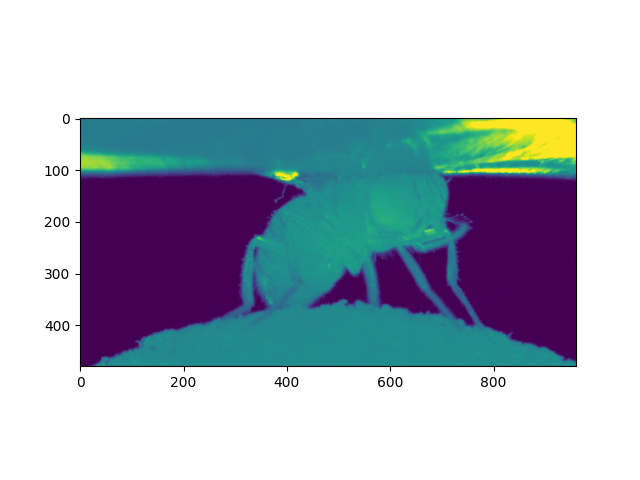

In [6]:
plt.imshow(img)

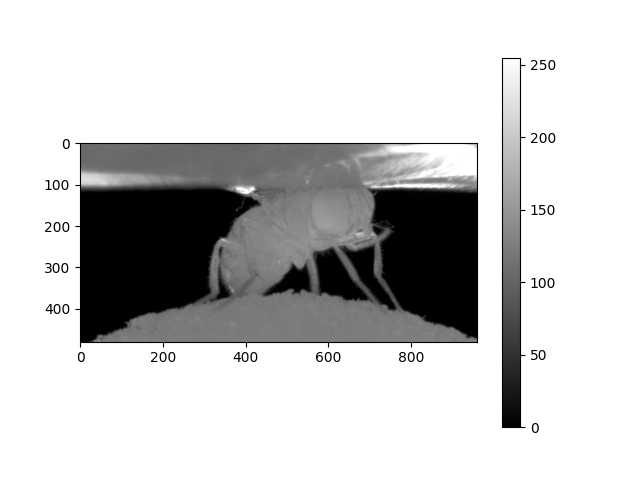

In [7]:
plt.figure()
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

Histogram
=========

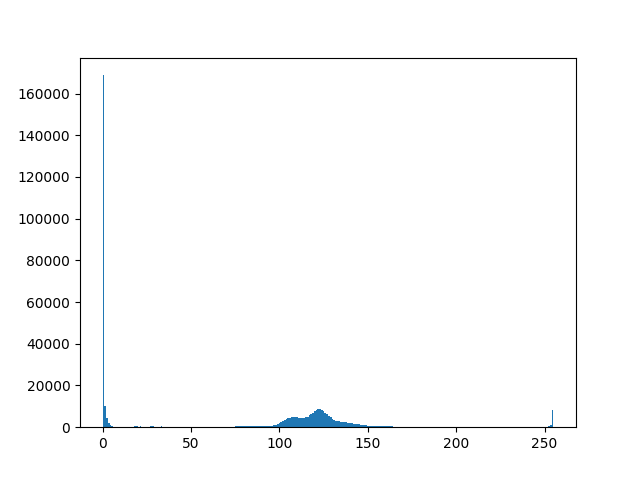

In [13]:
plt.figure()
plt.hist(img.flatten(), bins=256, range=(0, 255))
plt.show()

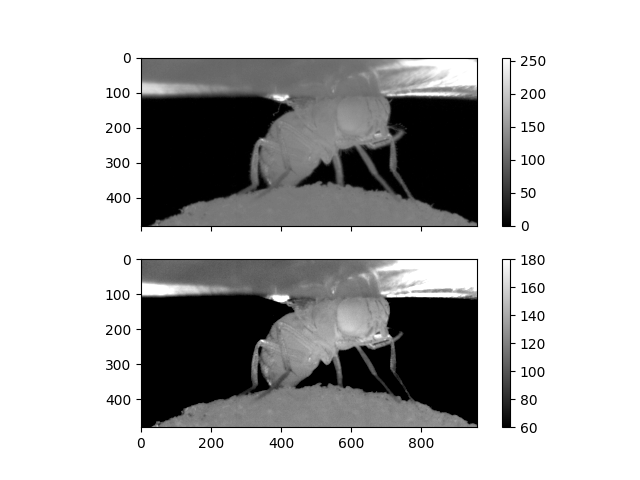

In [12]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
imgplot0 = axes[0].imshow(img, cmap="gray")
plt.colorbar(imgplot0, ax=axes[0])
imgplot1 = axes[1].imshow(img, cmap="gray", vmin=60, vmax=180)
plt.colorbar(imgplot1, ax=axes[1])

Cropping
========
Let's crop the image around the fly. Notice in the plot above that the origin of the coordinate system is in the top left corner. This is a universaly accepted convention in image analysis.

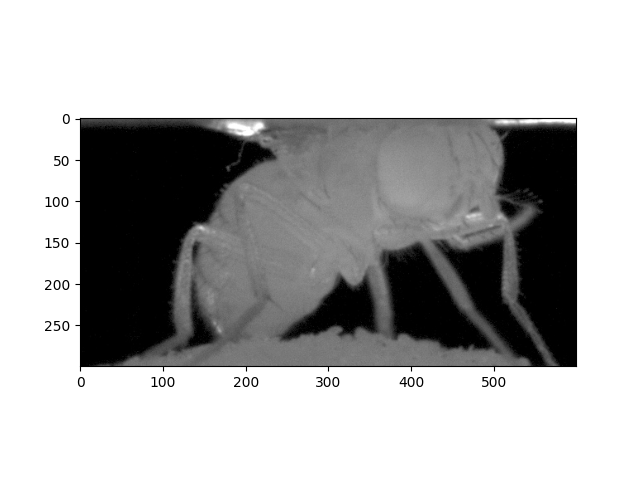

In [17]:
cropped = img[100:400, 200:800]
plt.figure()
plt.imshow(cropped, cmap="gray")

Thresholding and label images
=============================

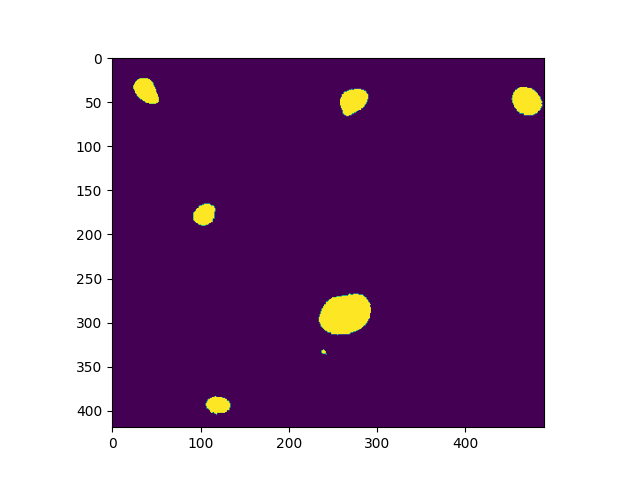

In [21]:
img = skimage.io.imread("C3-FluorescentCells.tif")
thresh = skimage.filters.threshold_otsu(img)
binary = img > thresh
plt.figure()
plt.imshow(binary)

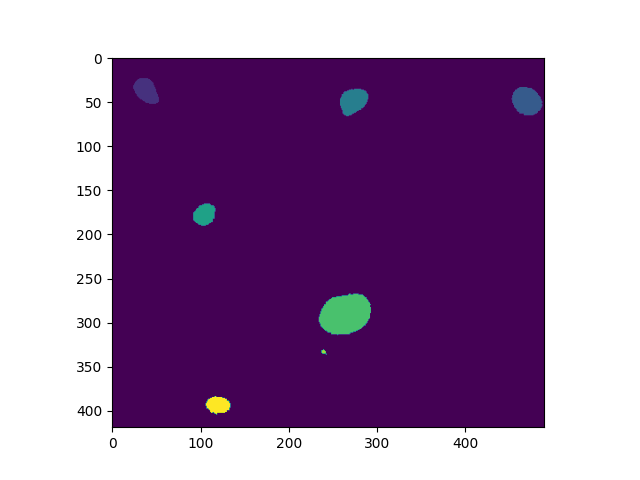

In [23]:
label_img = skimage.measure.label(binary)
plt.figure()
plt.imshow(label_img)

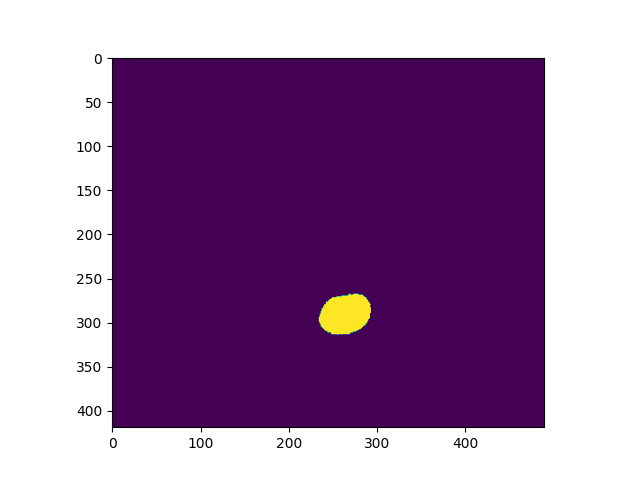

In [24]:
mask = (label_img == 5)
plt.figure()
plt.imshow(mask)

In [25]:
mask.dtype

dtype('bool')

In [27]:
import numpy as np
for i in range(1, label_img.max()):
    size = np.sum(label_img == i)
    print(f"Cell {i} is {size} pixels large.")

Cell 1 is 600 pixels large.
Cell 2 is 847 pixels large.
Cell 3 is 724 pixels large.
Cell 4 is 479 pixels large.
Cell 5 is 2136 pixels large.
Cell 6 is 20 pixels large.


In [29]:
img[label_img == 6].shape

(20,)

In [28]:
for i in range(1, label_img.max()):
    avg_fluo = img[label_img == i].mean()
    print(f"Cell {i} has an average fluorescence of {avg_fluo}.")

Cell 1 has an average fluorescence of 201.16333333333333.
Cell 2 has an average fluorescence of 142.82408500590319.
Cell 3 has an average fluorescence of 154.24309392265192.
Cell 4 has an average fluorescence of 111.56367432150313.
Cell 5 has an average fluorescence of 138.85486891385767.
Cell 6 has an average fluorescence of 101.8.


Multi-channel images
====================
RGB
---

In [30]:
img = skimage.io.imread("cheetah-running.jpg")

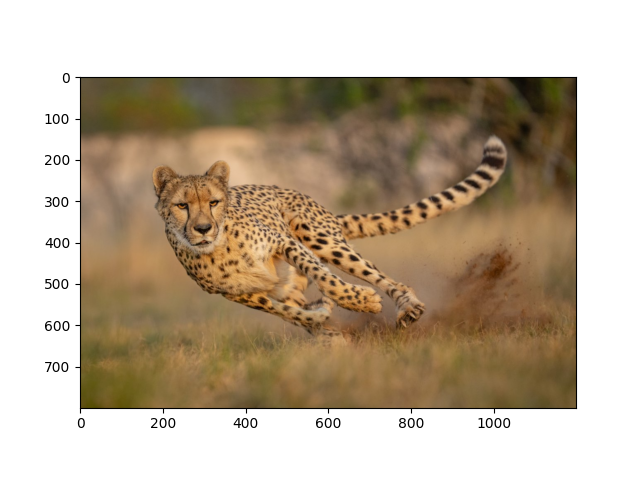

In [31]:
plt.figure()
plt.imshow(img)

In [32]:
img.shape

(800, 1200, 3)

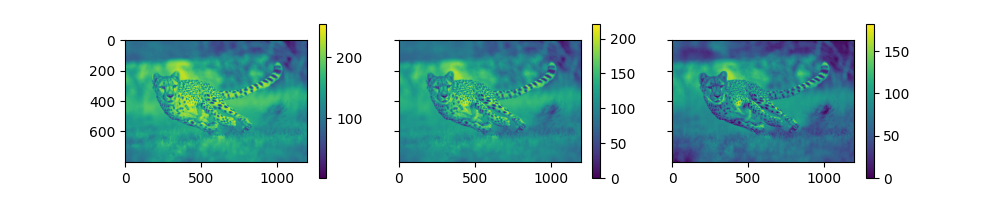

In [33]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 2))
for channel in range(3):
    imgplot = axes[channel].imshow(img[:, :, channel])
    plt.colorbar(imgplot, ax=axes[channel])

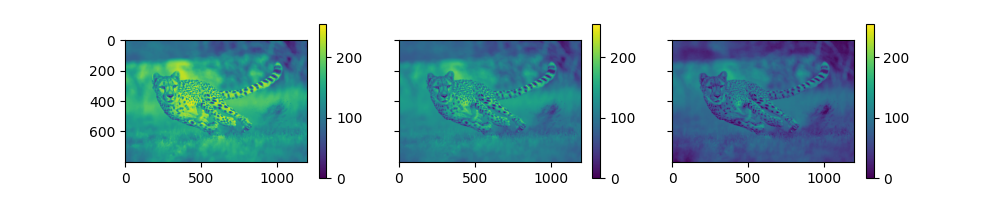

In [13]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 2))
for channel in range(3):
    imgplot = axes[channel].imshow(img[:, :, channel], vmin=0, vmax=2 ** 8 - 1)
    plt.colorbar(imgplot, ax=axes[channel])

Visulaizing images
==================
Matplotlib
----------
- ideal for 2D data
- imshow
- vmin, vmax
- color maps
- interpolate

Napari
------
- nD data
- interactions with a notebook

In [1]:
import napari
viewer = napari.Viewer()

In [15]:
viewer.add_image(img)

<Image layer 'img' at 0x72cf6c154190>

In [19]:
import numpy as np
gray = np.max(img, axis=2)
gray.shape

(800, 1200)

In [20]:
viewer.add_image(gray)

<Image layer 'gray' at 0x72cf67d67a60>

../src/intel/isl/isl.c:2235: FINISHME: ../src/intel/isl/isl.c:isl_surf_supports_ccs: CCS for 3D textures is disabled, but a workaround is available.


In [4]:
stack = skimage.io.imread("OtdFlp_TubGal80_NGFP_stained_20X_brain.lsm")
print(stack.shape)

(148, 1024, 1024, 3)


In [30]:
viewer.add_image(stack, channel_axis=3, colormap=["green", "blue", "magenta"])

[<Image layer 'Image' at 0x72cf672e9ba0>,
 <Image layer 'Image [1]' at 0x72cf647f0550>,
 <Image layer 'Image [2]' at 0x72cf6776d570>]

In [ ]:
# let's flip the stack 

In [5]:
viewer.add_image(stack[:, ::-1], channel_axis=3, colormap=["green", "blue", "magenta"])

[<Image layer 'Image' at 0x72c67ff3d180>,
 <Image layer 'Image [1]' at 0x72c6840b7370>,
 <Image layer 'Image [2]' at 0x72c67c7a9210>]

In [6]:
import scipy
stack = scipy.ndimage.rotate(stack, -130, axes=(1, 2))
viewer.add_image(stack, channel_axis=3, colormap=["green", "blue", "magenta"])

[<Image layer 'Image [3]' at 0x72c68402f160>,
 <Image layer 'Image [4]' at 0x72c691b495d0>,
 <Image layer 'Image [5]' at 0x72c691b67910>]

In [31]:
max_intensity_projection = np.max(stack, axis=0)
print(max_intensity_projection.shape)
viewer.add_image(max_intensity_projection, channel_axis=2, colormap=["green", "blue", "magenta"])

(1024, 1024, 3)


[<Image layer 'Image [3]' at 0x72cf673361a0>,
 <Image layer 'Image [4]' at 0x72cf67336e60>,
 <Image layer 'Image [5]' at 0x72cf29a50820>]

Saving images from python
=========================
- What format to use?
- compression lossy and lossless

Saving images for Fiji
----------------------
- tiff files
- imagej=True
- metadata and imagej tags

In [7]:
import tifffile

tifffile.imwrite("testwrite.tif", stack)

In [14]:
stack.shape

(148, 1443, 1443, 3)

In [13]:
tifffile.imwrite("testwrite.tif", stack, imagej=True, metadata={'axes': 'ZYXC'})

ValueError: ImageJ hyperstack axes must be in TZCYXS order

In [16]:
import numpy as np
stack = np.rollaxis(stack, 3, 1)
stack.shape

(148, 3, 1443, 1443)

In [18]:
tifffile.imwrite("testwrite.tif", stack, imagej=True, metadata={"axes": "ZCYX"})

In [22]:
tifffile.imwrite("testwrite.tif", stack, imagej=True, metadata={"axes": "ZCYX", "mode": "composite"})

In [23]:
stack.dtype

dtype('uint8')

In [26]:
green_lut = np.zeros((3, 256), dtype=np.uint8)
green_lut[1] = np.arange(256)
blue_lut = np.zeros((3, 256), dtype=np.uint8)
blue_lut[2] = np.arange(256)
mangenta_lut = np.zeros((3, 256), dtype=np.uint8)
mangenta_lut[0] = np.arange(256)
mangenta_lut[2] = np.arange(256)
tifffile.imwrite("testwrite.tif", stack, imagej=True, metadata={"axes": "ZCYX", "mode": "composite", "LUTs": [green_lut, blue_lut, mangenta_lut]})

Beyond numpy
============
- pytorch / tensorflow for computations on the GPU and differentiation (instead of `numpy.array` we use `torch.Tensor` or `tensorflow.Tensor`)
- dask for datasets that are too big to fit in memory (instead of `numpy.array` we use `dask.array`)

In [3]:
import dask
img = dask.array.image.imread("tifs/*.tif")
img.shape

In [ ]:
img.dtype

In [ ]:
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return f"{s:.2f} {size_name[i]}"
    
convert_size(img.size * 2)